# Linear Regression


*   Predicting Adipose Tissue value using Waist circumference




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


####Getting my data

In [0]:
df=pd.read_csv('/content/drive/My Drive/colab/wc-at.csv')

In [5]:
df


,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


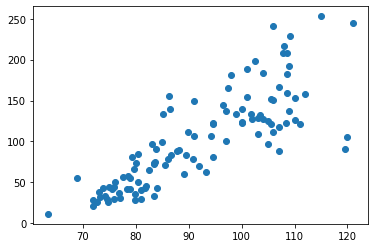

In [6]:
plt.scatter(df.Waist,df.AT)

### Correlation between two variables

In [7]:
np.corrcoef(df.Waist,df.AT)   #0.81 good correlation   

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [8]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Creating linear regression model

In [0]:
model=smf.ols('AT~Waist',data=df).fit()

In [10]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.62e-27
Time:                        09:45:07   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Predicted line

In [0]:
def abline(slope, intercept):
    
    x_vals=df.iloc[:,1:2].values
    y_vals = intercept + slope * x_vals
    plt.scatter(df.Waist,df.AT)      # the scatter plot 0f your data    
    plt.plot(x_vals, y_vals, '--',color='red')   # model prediction

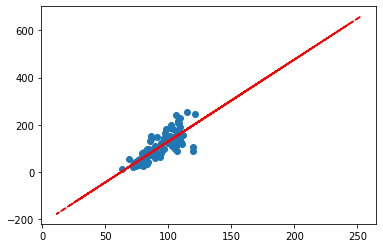

In [12]:
abline(3.4589,-215.9815)

In [0]:
pred1=model.predict(pd.DataFrame(df['Waist']))  #model predictions

In [14]:
pred1

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

###Confidence Interval



*   This give two line's intercept and slope. 
*   Here we specify an argument 0.01 that means 99% confidence
*   so this specify the variation of the points from the line we predicted





In [15]:
model.conf_int(0.01) 

,0,1
Intercept,-273.143516,-158.819460
Waist,2.843470,4.074248


In [16]:
print(model.conf_int(0.01))

                    0           1
Intercept -273.143516 -158.819460
Waist        2.843470    4.074248


###Function for Confidence interval line plot

In [0]:
def conline(slope, intercept,slopeL,interceptL,slopeU,interceptU):
    
    x_vals=df.iloc[:,1:2].values
    y_vals = intercept + slope * x_vals
    yL=interceptL + slopeL * x_vals
    yU=interceptU + slopeU * x_vals
    plt.scatter(df.Waist,df.AT)      # the scatter plot 0f your data    
    plt.plot(x_vals, y_vals, '--',color='red')   # model prediction
    plt.plot(x_vals, yL, '--',color='Green')
    plt.plot(x_vals,yU, '--',color='orange')

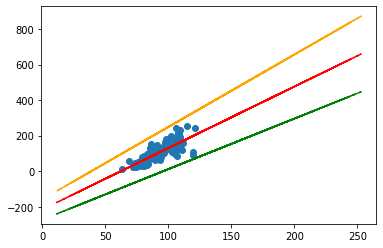

In [18]:
conline(3.4589,-215.9815,2.843470,-273.143516,4.074248,-158.819460)

###Finding Root Mean Square Error

In [19]:
res = df.AT - pred1
sqres = res*res
mse = np.mean(sqres)
rmse = np.sqrt(mse)
rmse

32.76017749575514

We see that our model os only having an accuract of 67 % so we need to transform the line to get better accuracy

##Transformation

###Exponential Model

WE take log of y values

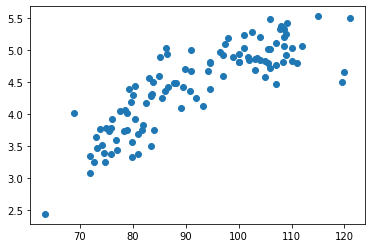

In [20]:
plt.scatter(df.Waist,np.log(df.AT))

In [21]:
np.corrcoef(df.Waist,np.log(df.AT))# correlation increase to 84

array([[1.        , 0.84090069],
       [0.84090069, 1.        ]])

In [0]:
model1=smf.ols('np.log(AT)~Waist',data=df).fit()

In [23]:
model1.summary()# accuracy increased to 70%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.68e-30
Time:                        09:45:08   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
pred=model1.predict(pd.DataFrame(df['Waist']))

In [25]:
exp_pred=np.exp(pred)
res=df.AT-exp_pred
sqres = res*res
mse = np.mean(sqres)
rmse = np.sqrt(mse)
rmse

38.52900175807143

###Log Transformation

We take log of x value

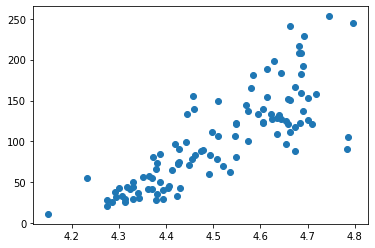

In [26]:
plt.scatter(np.log(df.Waist),df.AT)

In [27]:
np.corrcoef(np.log(df.Waist),df.AT)#82%

array([[1.        , 0.82177819],
       [0.82177819, 1.        ]])

In [0]:
model2=smf.ols('AT~np.log(Waist)',data=df).fit()

In [29]:
model2.summary()#no increase in Accuracy

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Sun, 03 May 2020   Prob (F-statistic):           6.80e-28
Time:                        09:45:08   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Polynomial Transformation

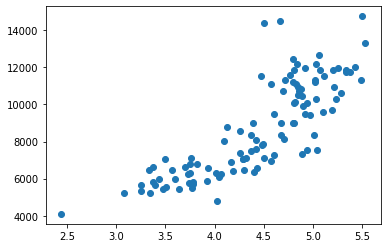

In [30]:
plt.scatter(np.log(df.AT),df.Waist+(df.Waist*df.Waist))

In [31]:
np.corrcoef(np.log(df.AT),df.Waist+(df.Waist*df.Waist))

array([[1.        , 0.82088148],
       [0.82088148, 1.        ]])

In [0]:
model3=smf.ols('np.log(AT)~(Waist+(Waist*Waist))',data=df).fit()

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.68e-30
Time:                        09:45:34   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
pred3=model3.predict(pd.DataFrame(df['Waist']))

In [0]:
exp_pred3=np.exp(pred3)

In [0]:
res=df.AT-exp_pred3

In [43]:

sqres = res*res
mse = np.mean(sqres)
rmse = np.sqrt(mse)
rmse

38.52900175807143